In [2]:
import pandas as pd
filename = '1csv/1core-ob1-vader'
extension = '.csv'
df = pd.read_csv(filename+extension)
df

,#bytes,#repetitions,t[usec],Mbytes/sec
0,0,1000,0.25,0.00
1,1,1000,0.28,3.52
2,2,1000,0.28,7.15
3,4,1000,0.28,14.38
4,8,1000,0.28,28.98
5,16,1000,0.30,53.65
6,32,1000,0.30,106.20
7,64,1000,0.33,193.70
8,128,1000,0.39,325.44
9,256,1000,0.44,576.34


In [3]:
import plotly.express as px

fig = px.scatter(df, x = '#bytes', y = 'Mbytes/sec', title='core-ob1-tcp')
fig.show()

In [4]:
x_data, y = df['#bytes'].values, df['t[usec]'].values

tick_list = list(range(len(x_data - 1)))

def objective(x_data, c, bandwidth):
	return c + (x_data / bandwidth)

In [5]:
from scipy.optimize import curve_fit

# curve fit
popt, _ = curve_fit(objective, x_data, y)
# summarize the parameter values
a, b = popt
print('y = %.5f + (x / %.5f)' % (a, b))

y = -46.67697 + (x / 4492.23388)


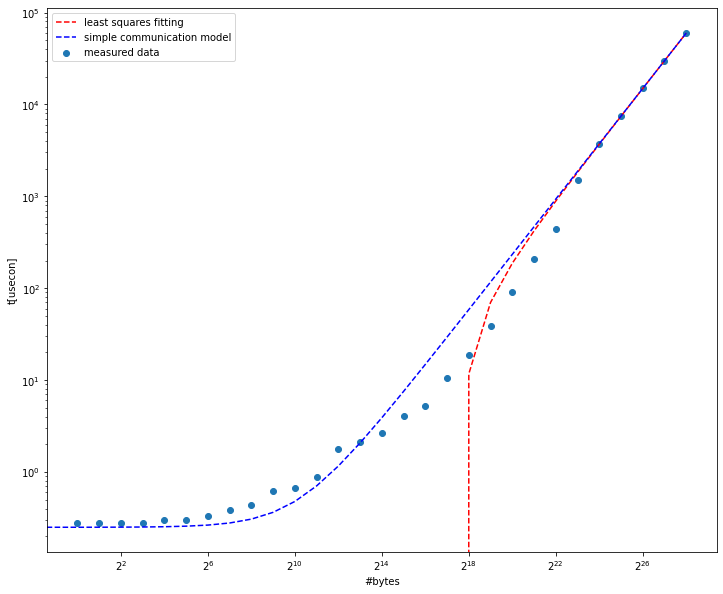

In [7]:
import matplotlib.pyplot as plt
from numpy import arange
plt.rcParams["figure.figsize"] = (12,10)

plt.scatter(x_data, y, label='measured data')
y_estimated = objective(x_data, a, b)
plt.plot(x_data, y_estimated, '--', color='red', label='least squares fitting')

c = y[0]
bandwidth = df['Mbytes/sec'][-1:]

T_comm = [c + (element / bandwidth) for element in x_data]
plt.plot(x_data, T_comm, '--', color='blue', label='simple communication model')
plt.ylabel('t[usecon]')
plt.xlabel('#bytes')
#plt.xticks(x_data, tick_list)
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.legend(loc="upper left")
plt.show()
#plt.savefig()

In [8]:
df['t[usec] computed'] = [round(number, 2) for number in y_estimated]
Mbytes_comp = [round(number, 2) for number in (x_data / y_estimated)]
df['Mbytes/sec computed'] = Mbytes_comp

In [9]:
df.to_csv(filename, sep=",", index=False)

In [10]:
pd.read_csv(filename)

,#bytes,#repetitions,t[usec],Mbytes/sec,t[usec] computed,Mbytes/sec computed
0,0,1000,0.97,0.00,3.58,0.00
1,1,1000,0.97,1.03,3.58,0.28
2,2,1000,0.99,2.02,3.58,0.56
3,4,1000,0.99,4.06,3.58,1.12
4,8,1000,0.98,8.18,3.58,2.24
5,16,1000,0.98,16.31,3.58,4.47
6,32,1000,0.99,32.19,3.58,8.94
7,64,1000,1.16,55.02,3.58,17.86
8,128,1000,1.21,105.86,3.59,35.67
9,256,1000,1.44,178.12,3.60,71.12
